<a href="https://colab.research.google.com/github/smitaforward/Data_Science/blob/master/BridgeWater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pd.__version__

'0.22.0'

In [5]:
!pwd

/content


# Prep the data

In [6]:
xls = pd.ExcelFile('/content/gdrive/My Drive/INV/13F/BridgeWater.xlsx')
xls.sheet_names

['20161231',
 '20170331',
 '20170630',
 '20170930',
 '20171231',
 '20180331',
 '20180630',
 '20180930',
 '20181230']

In [0]:
columns = ['Issuer','Class','CUSIP','Size$k', 'Amount', 'Date']

In [0]:
df = pd.DataFrame(columns = columns)

In [0]:
for sheetName in xls.sheet_names:
    data = xls.parse(sheetName, skiprows = 2).iloc[:,[0,1,2,3,4]]
    data['Date'] = sheetName
    data.columns = columns
    
    df = df.append(data, ignore_index= True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3121 entries, 0 to 3120
Data columns (total 6 columns):
Issuer    3121 non-null object
Class     3121 non-null object
CUSIP     3121 non-null object
Size$k    3121 non-null object
Amount    3121 non-null object
Date      3121 non-null object
dtypes: object(6)
memory usage: 146.4+ KB


In [0]:
df['Date']= pd.to_datetime(df['Date'])

In [0]:
df['Name'] = df['Issuer'] + ' / '+df['Class']

In [13]:
df.head()

,Issuer,Class,Size$k,Amount,Date,Name
0,ABBOTT LABS,COM,3080,80200,2016-12-31,ABBOTT LABS / COM
1,ACTIVISION BLIZZARD INC,COM,857,23744,2016-12-31,ACTIVISION BLIZZARD INC / COM
2,AETNA INC NEW,COM,23438,189000,2016-12-31,AETNA INC NEW / COM
3,AFFILIATED MANAGERS GROUP,COM,3008,20700,2016-12-31,AFFILIATED MANAGERS GROUP / COM
4,AFLAC INC,COM,3171,45563,2016-12-31,AFLAC INC / COM


# The change from 2018 Q3 to 2018 Q4

In [13]:
data = df.drop(['Issuer','Class'], axis=1)
data.head()

,CUSIP,Size$k,Amount,Date,Name
0,2824100,3080,80200,2016-12-31,ABBOTT LABS / COM
1,00507V109,857,23744,2016-12-31,ACTIVISION BLIZZARD INC / COM
2,00817Y108,23438,189000,2016-12-31,AETNA INC NEW / COM
3,8252108,3008,20700,2016-12-31,AFFILIATED MANAGERS GROUP / COM
4,1055102,3171,45563,2016-12-31,AFLAC INC / COM


In [18]:
data[data['Name'] == 'NETAPP INC / COM']

,CUSIP,Size$k,Amount,Date,Name
173,64110D104,7086,200920,2016-12-31,NETAPP INC / COM
422,64110D104,5898,140942,2017-03-31,NETAPP INC / COM
715,64110D104,4859,121331,2017-06-30,NETAPP INC / COM
1030,64110D104,11991,274012,2017-09-30,NETAPP INC / COM
2518,64110D104,620,7219,2018-09-30,NETAPP INC / COM
2952,64110D104,35740,598957,2018-12-30,NETAPP INC / COM


In [0]:
data_180930 = data[data['Date']=='2018-09-30']
data_181230 = data[data['Date']=='2018-12-30']

In [0]:
all = pd.merge(data_180930, data_181230, on = 'CUSIP', how = 'outer', suffixes=('_180930', '_181230')).sort_values('Amount_181230', ascending = False)

In [0]:
all.to_excel('/content/all.xlsx')

In [17]:
all[all['Date_180930'].isna()]

,CUSIP,Size$k_180930,Amount_180930,Date_180930,Name_180930,Size$k_181230,Amount_181230,Date_181230,Name_181230
447,501797104,NaN,NaN,NaT,NaN,21175,824882,2018-12-30,L BRANDS INC / COM
424,35671D857,NaN,NaN,NaT,NaN,7380,715777,2018-12-30,FREEPORT-MCMORAN INC / CL B
413,277432100,NaN,NaN,NaT,NaN,45661,624555,2018-12-30,EASTMAN CHEM CO / COM
456,574599106,NaN,NaN,NaT,NaN,16796,574409,2018-12-30,MASCO CORP / COM
390,143658300,NaN,NaN,NaT,NaN,26066,528726,2018-12-30,CARNIVAL CORP / UNIT 99/99/9999
480,69331C108,NaN,NaN,NaT,NaN,9925,417895,2018-12-30,PG&E CORP / COM
416,281020107,NaN,NaN,NaT,NaN,19304,340033,2018-12-30,EDISON INTL / COM
370,03076C106,NaN,NaN,NaT,NaN,35053,335850,2018-12-30,AMERIPRISE FINL INC / COM
398,192446102,NaN,NaN,NaT,NaN,19473,306763,2018-12-30,COGNIZANT TECHNOLOGY SOLUTIO / CL A
361,15351109,NaN,NaN,NaT,NaN,27055,277885,2018-12-30,ALEXION PHARMACEUTICALS INC / COM


In [0]:
l2=list(df[df.index=='2018-12-30']['Name'])

In [0]:
l3 = [l for l in l2 if l not in l1]
l3

['ACTIVISION BLIZZARD INC',
 'ACUITY BRANDS INC',
 'ADTALEM GLOBAL ED INC',
 'AES CORP',
 'AFFILIATED MANAGERS GROUP',
 'AGCO CORP',
 'ALBEMARLE CORP',
 'ALEXION PHARMACEUTICALS INC',
 'ALIGN TECHNOLOGY INC',
 'ALLEGHANY CORP DEL',
 'ALLEGHENY TECHNOLOGIES INC',
 'AMEREN CORP',
 'AMERICAN CAMPUS CMNTYS INC',
 'AMERICAN EAGLE OUTFITTERS NE',
 'AMERICAN FINL GROUP INC OHIO',
 'AMERICAN WTR WKS CO INC NEW',
 'AMERIPRISE FINL INC',
 'AMERISOURCEBERGEN CORP',
 'AMETEK INC NEW',
 'ANIXTER INTL INC',
 'APARTMENT INVT & MGMT CO',
 'APTARGROUP INC',
 'AQUA AMERICA INC',
 'ARCHER DANIELS MIDLAND CO',
 'ARES CAP CORP',
 'ARROW ELECTRS INC',
 'ATMOS ENERGY CORP',
 'AVERY DENNISON CORP',
 'AVX CORP NEW',
 'BALL CORP',
 'BANK AMER CORP',
 'BHP GROUP LIMITED',
 'BIG LOTS INC',
 'BROWN & BROWN INC',
 'BRUKER CORP',
 'BUNGE LIMITED',
 'CABOT CORP',
 'CARNIVAL CORP',
 'CELANESE CORP DEL',
 'CERNER CORP',
 'CF INDS HLDGS INC',
 'CHURCH & DWIGHT INC',
 'CIENA CORP',
 'CINCINNATI FINL CORP',
 'CITIGROUP IN

In [0]:
set(df[df['Name'].isin(l3)].index)

{Timestamp('2016-12-31 00:00:00'),
 Timestamp('2017-03-31 00:00:00'),
 Timestamp('2017-06-30 00:00:00'),
 Timestamp('2017-09-30 00:00:00'),
 Timestamp('2017-12-31 00:00:00'),
 Timestamp('2018-03-31 00:00:00'),
 Timestamp('2018-06-30 00:00:00'),
 Timestamp('2018-12-30 00:00:00')}

# Gold Position 

In [0]:
# filter by 'gold'
df_gold = df[df['Name'].str.contains('gold', case = False)]
df_gold.tail(20)

,Name,Size$k,Amount
Date,,,
2018-09-30,KIRKLAND LAKE GOLD LTD,683,36041
2018-09-30,NEW GOLD INC CDA,63,79689
2018-09-30,RANDGOLD RES LTD,1024,14520
2018-09-30,ROYAL GOLD INC,987,12807
2018-09-30,SPDR GOLD TRUST,440779,3908999
2018-09-30,YAMANA GOLD INC,372,149216
2018-12-30,ANGLOGOLD ASHANTI LTD,884,70471
2018-12-30,B2GOLD CORP,490,167628
2018-12-30,BARRICK GOLD CORP,8726,646120


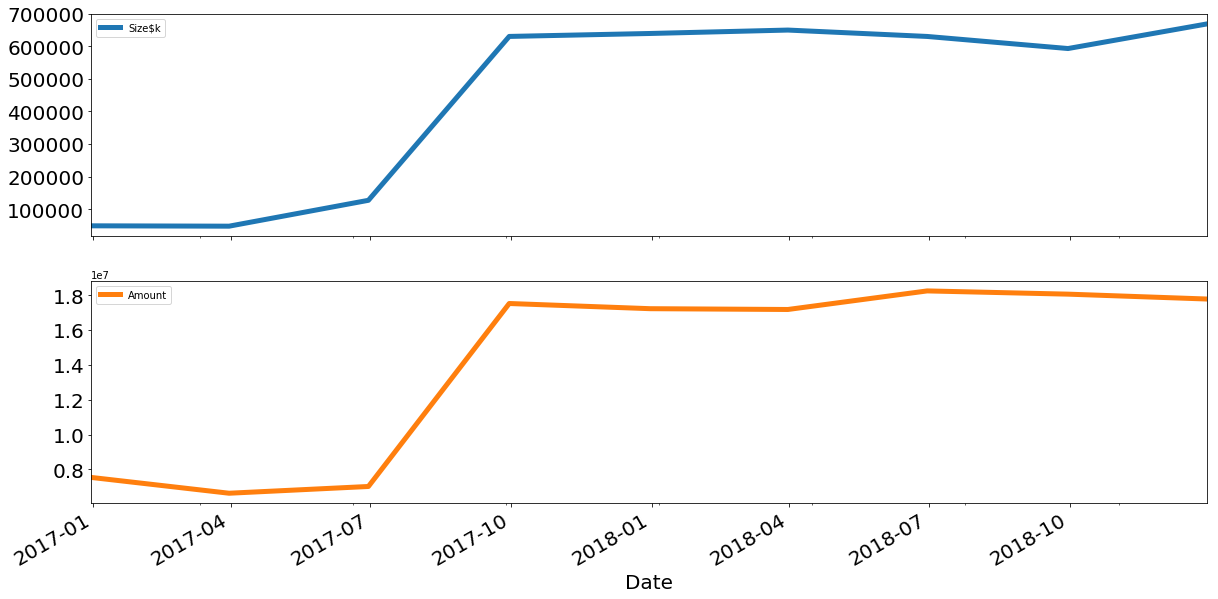

In [0]:
df_gold.groupby('Date').agg({'Size$k':'sum', 'Amount':'sum'}).plot.line(subplots = True, figsize = (20,10), linewidth = 5, fontsize = 20)
plt.xlabel('Date', fontsize = 20);

In [0]:
total_gold = df_gold.groupby('Date').agg({'Size$k':'sum', 'Amount':'sum'})
total_gold.columns = ['Gold_size$k', 'Gold_amount']
total_gold

,Gold_size$k,Gold_amount
Date,,
2016-12-31,48845,7538803
2017-03-31,47740,6632048
2017-06-30,127193,7019854
2017-09-30,630469,17524902
2017-12-31,639534,17227282
2018-03-31,650018,17181456
2018-06-30,630401,18247586
2018-09-30,593296,18061982
2018-12-30,669068,17781464


In [0]:
total = df.groupby('Date').agg({'Size$k':'sum', 'Amount':'sum'})
total.columns = ['Total_size$k', 'Total_amount']
total

,Total_size$k,Total_amount
Date,,
2016-12-31,10528018,242149183
2017-03-31,8817696,187671410
2017-06-30,10919101,227510938
2017-09-30,14906251,275824621
2017-12-31,12214888,205834609
2018-03-31,10484634,179820645
2018-06-30,10008512,168666827
2018-09-30,9653614,161755237
2018-12-30,10928292,219113598


In [0]:
total_by_date = pd.concat([total_gold, total], axis = 1)

In [0]:
total_by_date['Gold_size$k%'] = total_by_date['Gold_size$k']/total_by_date['Total_size$k']*100
total_by_date['Amount%'] = total_by_date['Gold_amount']/total_by_date['Total_amount']*100

In [0]:
total_by_date

,Gold_size$k,Gold_amount,Total_size$k,Total_amount,Gold_size$k%,Amount%
Date,,,,,,
2016-12-31,48845,7538803,10528018,242149183,0.463952,3.113289
2017-03-31,47740,6632048,8817696,187671410,0.541411,3.533862
2017-06-30,127193,7019854,10919101,227510938,1.164867,3.085502
2017-09-30,630469,17524902,14906251,275824621,4.229561,6.353639
2017-12-31,639534,17227282,12214888,205834609,5.235693,8.369478
2018-03-31,650018,17181456,10484634,179820645,6.199720,9.554774
2018-06-30,630401,18247586,10008512,168666827,6.298649,10.818717
2018-09-30,593296,18061982,9653614,161755237,6.145843,11.166242
2018-12-30,669068,17781464,10928292,219113598,6.122347,8.115181


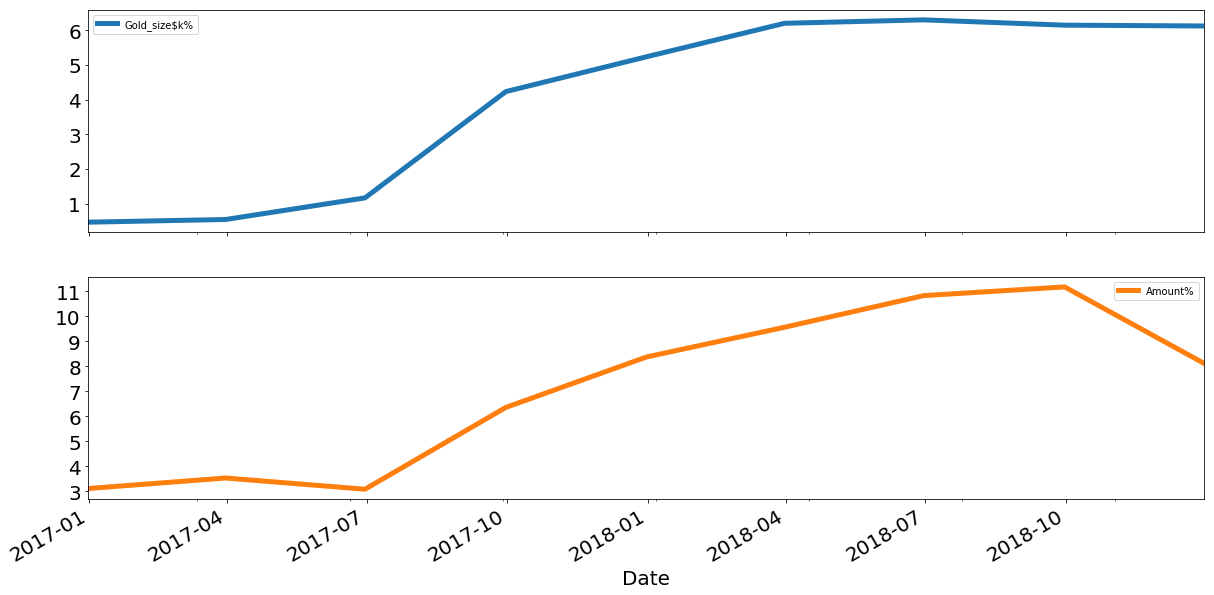

In [0]:
# plot the % of gold in long total position
total_by_date.loc[:,['Gold_size$k%','Amount%']].plot.line(subplots = True, figsize = (20, 10), linewidth = 5, fontsize = 20)
plt.xlabel('Date', fontsize = 20);

BR's Gold related position has been increased significantly starting from 2017. From 2017 Q1 to Q2, it was doubled in term of position size and percentage of total long position. It is gold position size almost increased 6 times from 2017 Q2 to Q3 and then stay stable from there. It is percentage(out of total long position) continingly increased to 6 times until 2018 Q1 while the total long position is decreasing (since 2017 Q3, which we can see the evidence from the chat below).  

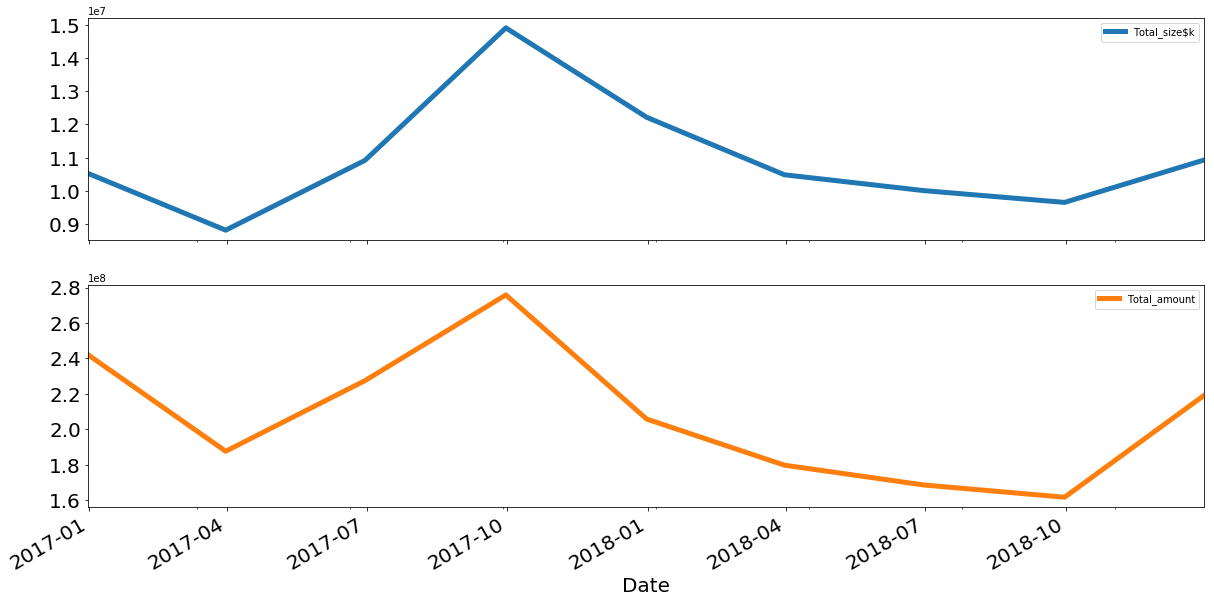

In [0]:
# plot of the total long position
total_by_date.loc[:,['Total_size$k','Total_amount']].plot.line(subplots = True, figsize = (20,10), linewidth = 5, fontsize = 20)
plt.xlabel('Date', fontsize = 20);

This indicates BR had been through a Major long position change. From 2017Q1 to 2017Q3, its long position increase from 0.9 to almost 1.5 then back off to 1.0 at the end of 2018Q3. 

# The Gold Postion Change from 2017 Q1 to Q3

In [0]:
df_gold.head()

,Name,Size$k,Amount
Date,,,
2016-12-31,ANGLOGOLD ASHANTI LTD,4843,460778
2016-12-31,B2GOLD CORP,2348,990305
2016-12-31,ELDORADO GOLD CORP NEW,2656,824500
2016-12-31,GOLD FIELDS LTD NEW,2744,911600
2016-12-31,GOLDCORP INC NEW,12293,903895


In [0]:
df_gold_2017Q1 = df_gold.loc[df_gold.index == '2017-03-31']
df_gold_2017Q2 = df_gold.loc[df_gold.index == '2017-06-30']
df_gold_2017Q3 = df_gold.loc[df_gold.index == '2017-09-30']

In [0]:
df_gold_2017Q2.head()

,Name,Size$k,Amount
Date,,,
2017-06-30,ANGLOGOLD ASHANTI LTD,873,89842
2017-06-30,B2GOLD CORP,693,246612
2017-06-30,BARRICK GOLD CORP,4108,258611
2017-06-30,ELDORADO GOLD CORP NEW,858,324874
2017-06-30,GOLD FIELDS LTD NEW,636,182716


In [0]:
# list of gold assets which add from 2017 Q1 to Q2
Q1_Q2_ls = [n for n in list(df_gold_2017Q2['Name']) if n not in list(df_gold_2017Q1['Name'])]
Q1_Q2_ls

['BARRICK GOLD CORP', 'ISHARES GOLD TRUST', 'SPDR GOLD TRUST']

In [0]:
df_gold_2017Q1_Q2 = df_gold_2017Q2[df_gold_2017Q2['Name'].isin( Q1_Q2_ls) ]
df_gold_2017Q1_Q2

,Name,Size$k,Amount
Date,,,
2017-06-30,BARRICK GOLD CORP,4108,258611
2017-06-30,ISHARES GOLD TRUST,36813,3083169
2017-06-30,SPDR GOLD TRUST,68129,577264


In [0]:
# list of gold assets which add from 2017 Q2 to Q3
Q2_Q3_ls = [n for n in list(df_gold_2017Q3['Name']) if n not in list(df_gold_2017Q2['Name'])]
Q2_Q3_ls

['KIRKLAND LAKE GOLD LTD']

In [0]:
df_gold_2017Q2_Q3 = df_gold_2017Q3[df_gold_2017Q3['Name'].isin( Q2_Q3_ls) ]
df_gold_2017Q2_Q3

,Name,Size$k,Amount
Date,,,
2017-09-30,KIRKLAND LAKE GOLD LTD,515,40035


In [0]:
# plot the 4 
df_gold_add = df_gold[df_gold['Name'].isin(Q1_Q2_ls + Q2_Q3_ls)].groupby(['Date', 'Name']).sum().unstack()
df_gold_add

Size$k                                            \
Name       BARRICK GOLD CORP ISHARES GOLD TRUST KIRKLAND LAKE GOLD LTD   
Date                                                                     
2017-06-30            4108.0            36813.0                    NaN   
2017-09-30            4152.0           138869.0                  515.0   
2017-12-31            2335.0           141560.0                  568.0   
2018-03-31            1965.0           144050.0                  555.0   
2018-06-30            6663.0           136016.0                  815.0   
2018-09-30            8399.0           129339.0                  683.0   

                                      Amount                     \
Name       SPDR GOLD TRUST BARRICK GOLD CORP ISHARES GOLD TRUST   
Date                                                              
2017-06-30         68129.0          258611.0          3083169.0   
2017-09-30        473543.0          258611.0         11280993.0   
2017-12-31        483348.0          160951.0         11315785.0   
2018-03-31        491713.0          157876.0         11315785.0   
2018-06-30        463803.0          507501.0         11315785.0   
2018-09-30        440779.0          759367.0         11315785.0   

                                                   
Name       KIRKLAND LAKE GOLD LTD SPDR GOLD TRUST  
Date                                               
2017-06-30                    NaN        577264.0  
2017-09-30                40035.0       3894908.0  
2017-12-31                36909.0       3908999.0  
2018-03-31                35859.0       3908999.0  
2018-06-30                38491.0       3908999.0  
2018-09-30                36041.0       3908999.0

In [0]:
df_gold_add.columns = df_gold_add.columns.swaplevel(0,1)

In [0]:
df_gold_add

Name,BARRICK GOLD CORP,ISHARES GOLD TRUST,KIRKLAND LAKE GOLD LTD,SPDR GOLD TRUST,BARRICK GOLD CORP,ISHARES GOLD TRUST,KIRKLAND LAKE GOLD LTD,SPDR GOLD TRUST
,Size$k,Size$k,Size$k,Size$k,Amount,Amount,Amount,Amount
Date,,,,,,,,
2017-06-30,4108.0,36813.0,NaN,68129.0,258611.0,3083169.0,NaN,577264.0
2017-09-30,4152.0,138869.0,515.0,473543.0,258611.0,11280993.0,40035.0,3894908.0
2017-12-31,2335.0,141560.0,568.0,483348.0,160951.0,11315785.0,36909.0,3908999.0
2018-03-31,1965.0,144050.0,555.0,491713.0,157876.0,11315785.0,35859.0,3908999.0
2018-06-30,6663.0,136016.0,815.0,463803.0,507501.0,11315785.0,38491.0,3908999.0
2018-09-30,8399.0,129339.0,683.0,440779.0,759367.0,11315785.0,36041.0,3908999.0


In [0]:
l0 = df_gold_add.columns.get_level_values(0)
l0

Index(['BARRICK GOLD CORP', 'ISHARES GOLD TRUST', 'KIRKLAND LAKE GOLD LTD',
       'SPDR GOLD TRUST', 'BARRICK GOLD CORP', 'ISHARES GOLD TRUST',
       'KIRKLAND LAKE GOLD LTD', 'SPDR GOLD TRUST'],
      dtype='object', name='Name')

In [0]:
l1 = df_gold_add.columns.get_level_values(1)
l1

Index(['Size$k', 'Size$k', 'Size$k', 'Size$k', 'Amount', 'Amount', 'Amount',
       'Amount'],
      dtype='object')

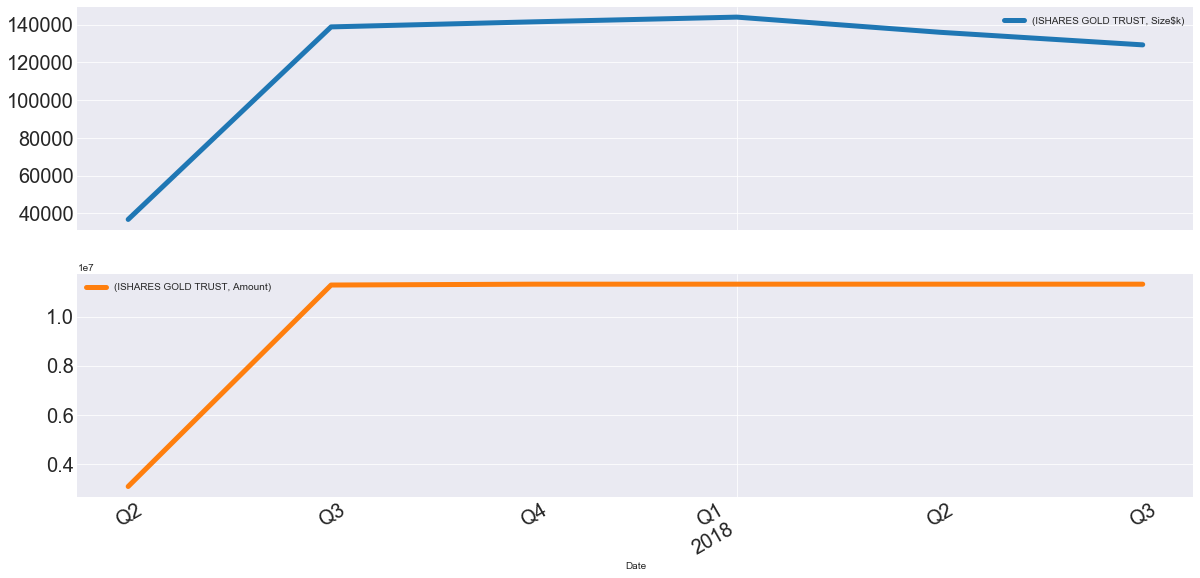

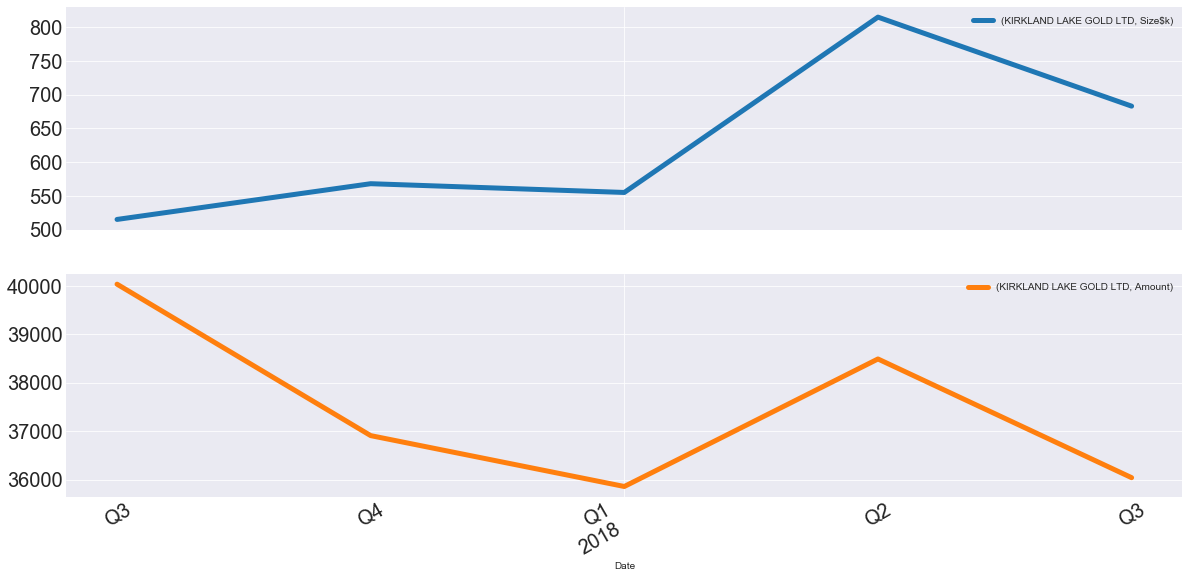

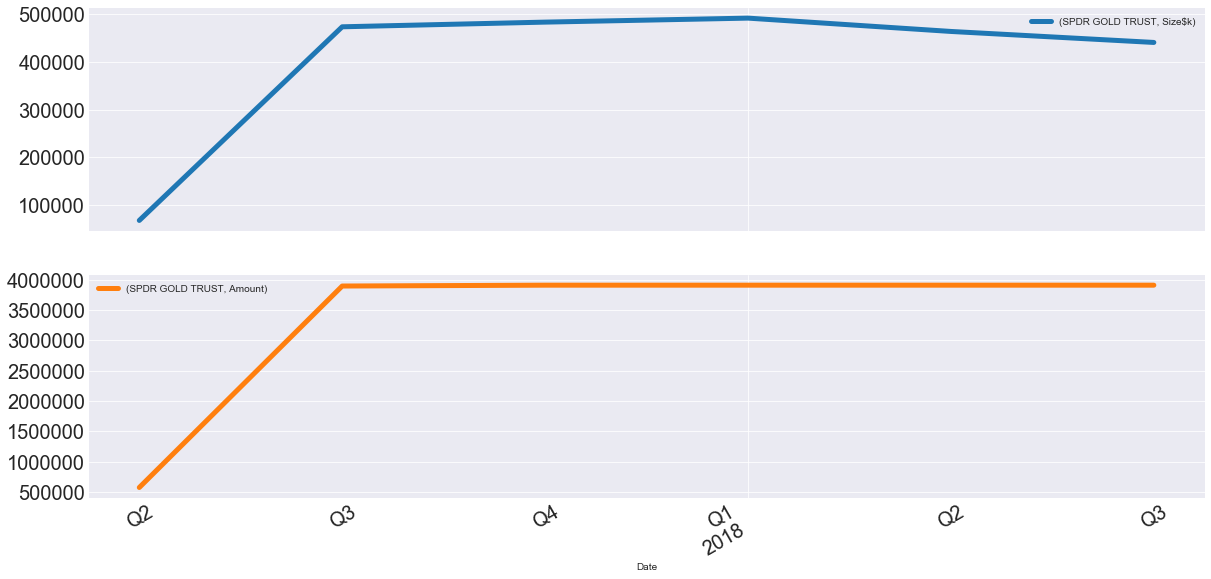

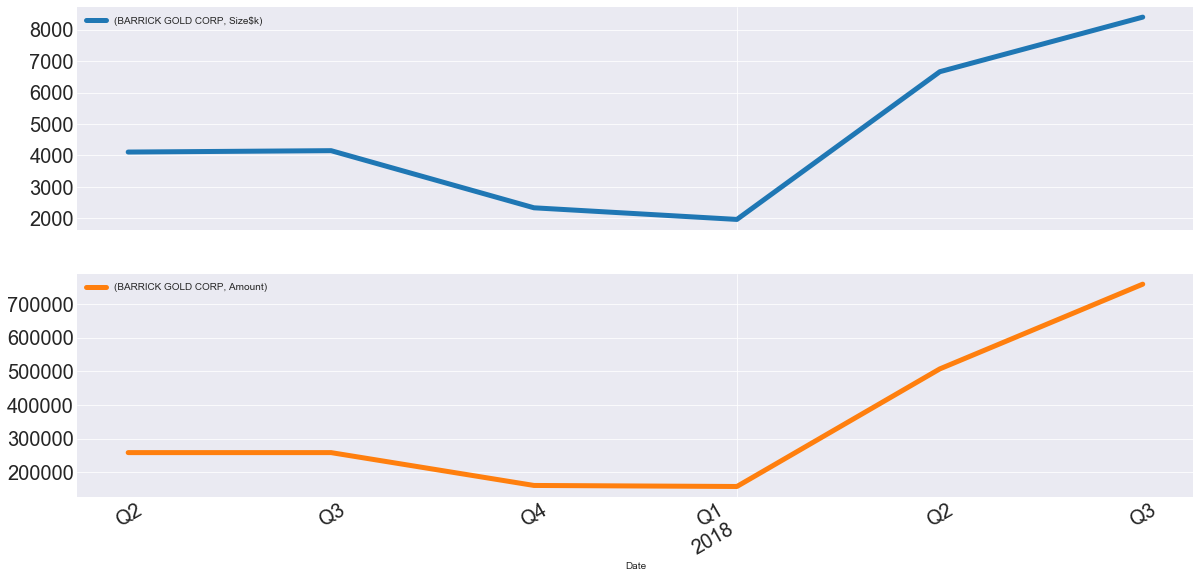

In [0]:
for n in set(l0):
    data = df_gold_add.loc[:,(l0 == n)]
    data.plot.line(subplots = True, figsize = (20,10), linewidth = 5, fontsize=20)
    

In [0]:
df_gold_other = df_gold[~df_gold['Name'].isin(Q1_Q2_ls + Q2_Q3_ls)]

In [0]:
df_gold_other.head()

,Name,Size$k,Amount
Date,,,
2016-12-31,ANGLOGOLD ASHANTI LTD,4843,460778
2016-12-31,B2GOLD CORP,2348,990305
2016-12-31,ELDORADO GOLD CORP NEW,2656,824500
2016-12-31,GOLD FIELDS LTD NEW,2744,911600
2016-12-31,GOLDCORP INC NEW,12293,903895


In [0]:
df_gold_other = df_gold_other.drop('Size$k', axis =1).groupby(['Date', 'Name']).sum().unstack()

In [0]:
df_gold_other

Amount                                     \
Name       ANGLOGOLD ASHANTI LTD B2GOLD CORP ELDORADO GOLD CORP NEW   
Date                                                                  
2016-12-31              460778.0    990305.0               824500.0   
2017-03-31              411794.0    946262.0               681599.0   
2017-06-30               89842.0    246612.0               324874.0   
2017-09-30               77014.0    187188.0               298328.0   
2017-12-31               73180.0    178166.0               282531.0   
2018-03-31               70896.0    163648.0               296636.0   
2018-06-30               78223.0    183209.0               295098.0   
2018-09-30               69766.0    158887.0               139433.0   

                                                                         \
Name       GOLD FIELDS LTD NEW GOLDCORP INC NEW GOLDMAN SACHS GROUP INC   
Date                                                                      
2016-12-31            911600.0         903895.0                     NaN   
2017-03-31            804805.0         700357.0                  9520.0   
2017-06-30            182716.0         358148.0                  2165.0   
2017-09-30            154549.0         337276.0                     NaN   
2017-12-31            148479.0         270418.0                     NaN   
2018-03-31            144607.0         243942.0                     NaN   
2018-06-30            156122.0         499131.0                 33045.0   
2018-09-30                 NaN         575729.0                 10886.0   

                                                                               \
Name       KINROSS GOLD CORP NEW GOLD INC CDA RANDGOLD RES LTD ROYAL GOLD INC   
Date                                                                            
2016-12-31         1418950.0         565600.0         104981.0        77900.0   
2017-03-31         1212288.0         529566.0          92676.0        63938.0   
2017-06-30          988757.0         381517.0          20208.0        19706.0   
2017-09-30          508027.0         106168.0          17744.0        14770.0   
2017-12-31          397255.0         103468.0          17207.0        14132.0   
2018-03-31          377957.0          99537.0          16530.0        27986.0   
2018-06-30          762132.0         110029.0          17111.0        17623.0   
2018-09-30          830857.0          79689.0          14520.0        12807.0   

                                             
Name       SIBANYE GOLD LTD YAMANA GOLD INC  
Date                                         
2016-12-31         234226.0       1046068.0  
2017-03-31         228704.0        950539.0  
2017-06-30         110217.0        376048.0  
2017-09-30              NaN        349291.0  
2017-12-31              NaN        319802.0  
2018-03-31              NaN        321198.0  
2018-06-30              NaN        325087.0  
2018-09-30              NaN        149216.0

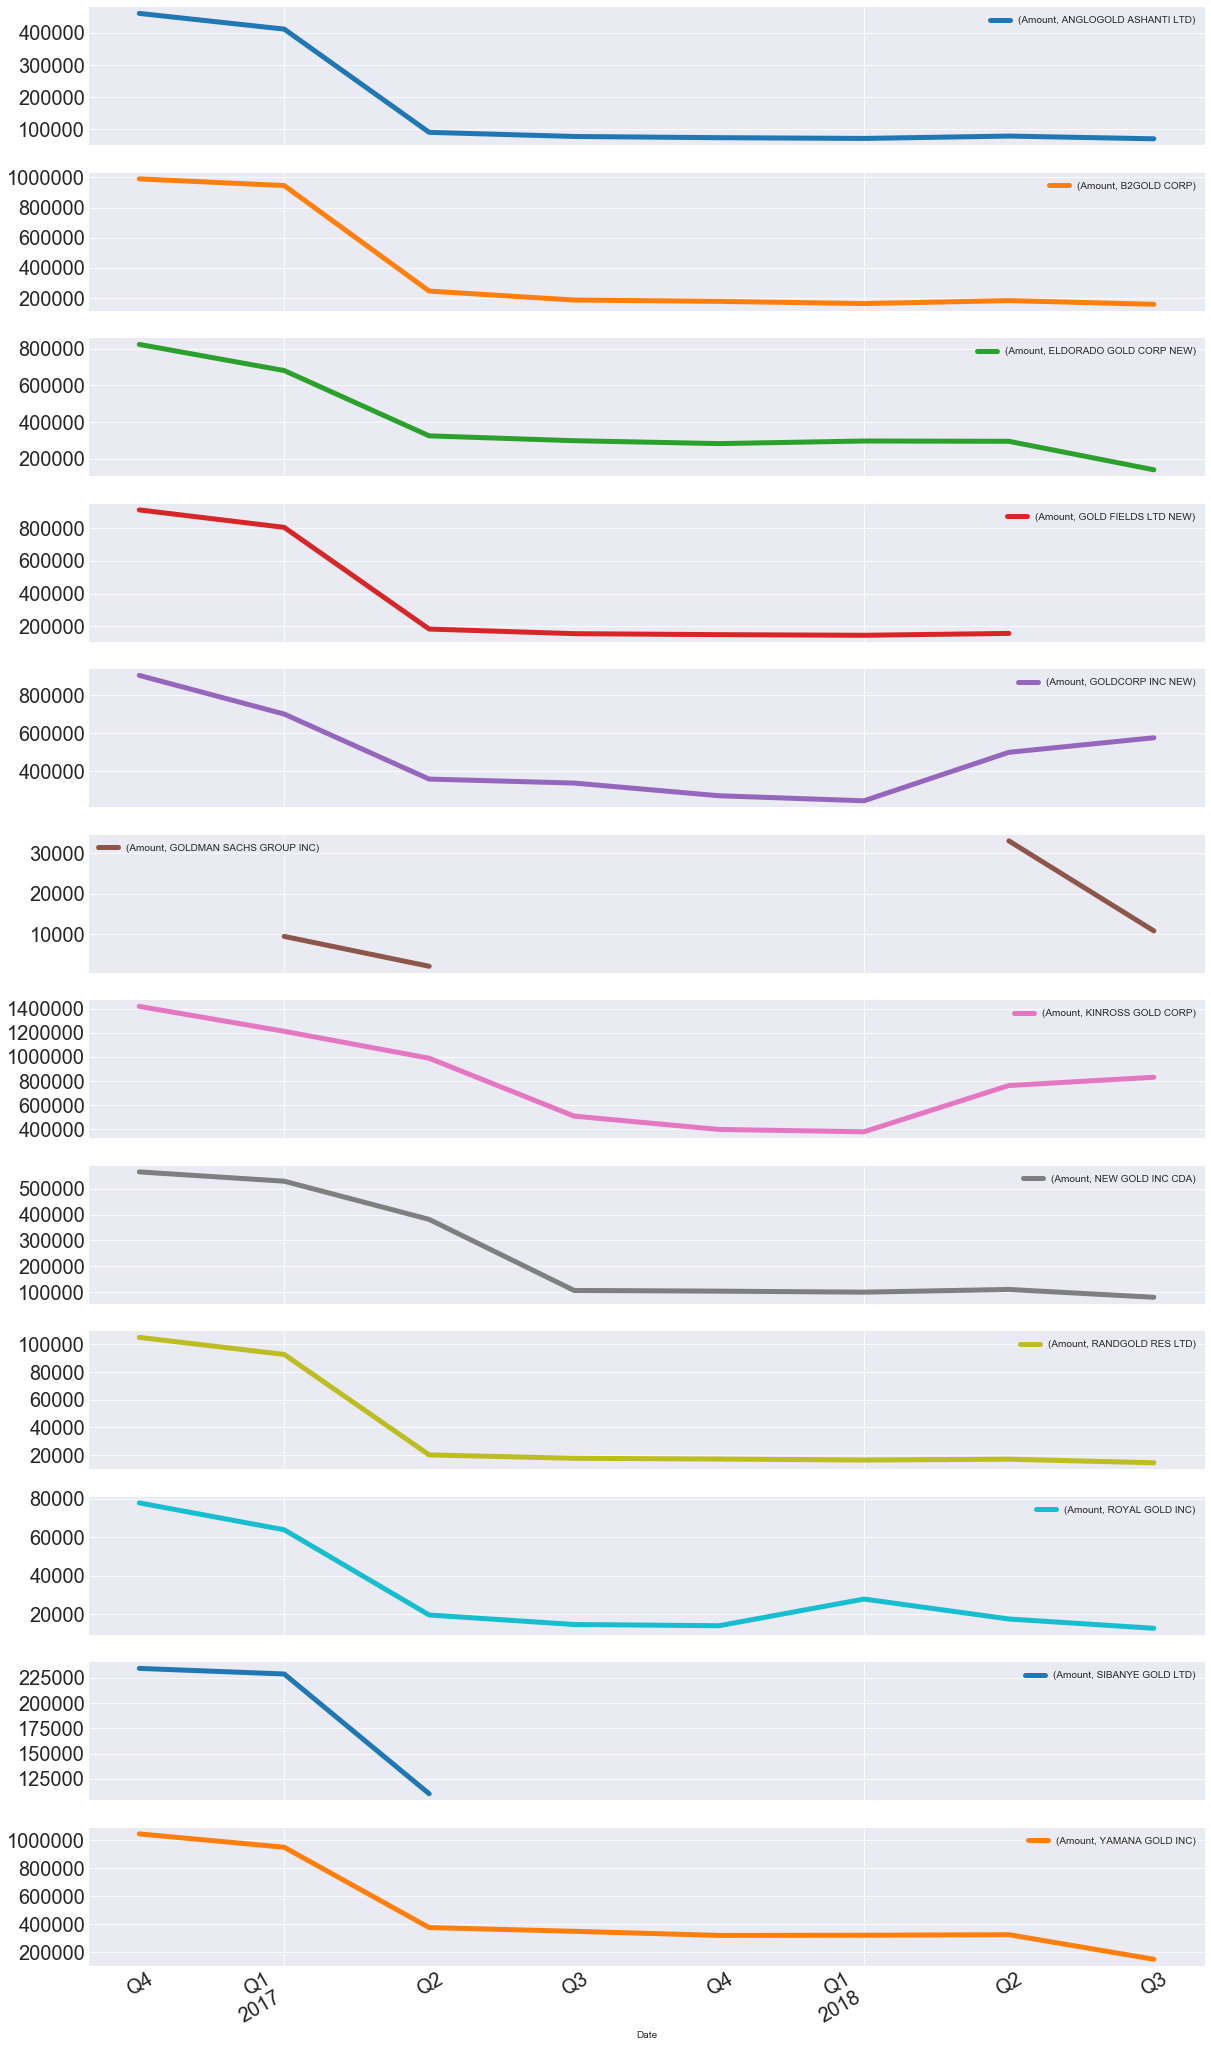

In [0]:
#plt.style.use('ggplot')

df_gold_other.plot.line(subplots= True,figsize = (20,40), fontsize = 20, linewidth = 5);
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize = 20)

SPDR and IAU are the major holding of BR for Gold. They started acquire them between 2017 Q1 and Q2 then add most of the current position between Q2 and Q3. The ave price is at the same level with today's level. All the other gold position are decreasing except 1) BARRICK GOLD CORP 2) Goldcorp and Kinross have some bounce up from 2018Q1.

# The reduced long position since 2017 Q3

In [0]:
df.shape

(2649, 3)

In [0]:
df_gold = df[df['Name'].str.contains('gold', case = False)]

In [0]:
df_gold.shape

(109, 3)

In [0]:
# filter by 'gold'
df_nongold = df[~df['Name'].str.contains('gold', case = False)]

In [0]:
df_nongold.shape

(2540, 3)

In [0]:
df_nongold_2017Q3 = df_nongold[df_nongold['Date'] == '2017-09-30']
df_nongold_2017Q4 = df_nongold[df_nongold['Date'] == '2017-12-31']

In [0]:
Q3_Q4_dump = [n for n in list(df_nongold_2017Q3['Name']) if n not in list(df_nongold_2017Q4['Name'])]
len(Q3_Q4_dump)

91

In [0]:
df_dump = df_nongold[df_nongold['Name'].isin(Q3_Q4_dump)]

In [0]:
df_dump.groupby(['Date',"Name"]).sum().unstack()

Size$k                                                 \
Name       ABBOTT LABS ACTIVISION BLIZZARD INC AES CORP AETNA INC NEW   
Date                                                                    
2016-12-31      3080.0                   857.0      NaN       23438.0   
2017-03-31         NaN                     NaN      NaN       10965.0   
2017-06-30         NaN                     NaN   1124.0           NaN   
2017-09-30       407.0                  7277.0    343.0        1893.0   
2018-03-31         NaN                     NaN    570.0           NaN   
2018-06-30         NaN                     NaN    354.0           NaN   
2018-09-30         NaN                     NaN      NaN           NaN   

                                                            \
Name       AMEREN CORP ANSYS INC ANTHEM INC APTARGROUP INC   
Date                                                         
2016-12-31         NaN     305.0    10726.0          256.0   
2017-03-31         NaN       NaN        NaN            NaN   
2017-06-30       487.0     458.0        NaN          564.0   
2017-09-30       740.0     315.0     1177.0          215.0   
2018-03-31       575.0    2429.0     1646.0         1428.0   
2018-06-30       360.0     815.0        NaN          577.0   
2018-09-30         NaN     558.0        NaN            NaN   

                                                     ...              Amount  \
Name       BECTON DICKINSON & CO BIO TECHNE CORP     ...     TYSON FOODS INC   
Date                                                 ...                       
2016-12-31                4886.0             NaN     ...            236000.0   
2017-03-31                 569.0             NaN     ...            180099.0   
2017-06-30                   NaN           573.0     ...            124645.0   
2017-09-30                3764.0           236.0     ...            175685.0   
2018-03-31                   NaN          1294.0     ...            134853.0   
2018-06-30                   NaN          1130.0     ...            126865.0   
2018-09-30                   NaN           395.0     ...            154354.0   

                                                                           \
Name       UNION PAC CORP UNITED TECHNOLOGIES CORP UNITEDHEALTH GROUP INC   
Date                                                                        
2016-12-31            NaN                      NaN               163900.0   
2017-03-31            NaN                      NaN                21941.0   
2017-06-30        15025.0                  18028.0                 5357.0   
2017-09-30        20321.0                  18028.0                 4492.0   
2018-03-31            NaN                      NaN                 5609.0   
2018-06-30            NaN                      NaN                    NaN   
2018-09-30            NaN                      NaN                    NaN   

                                                                          \
Name       V F CORP VARIAN MED SYS INC VIACOM INC NEW WASTE MGMT INC DEL   
Date                                                                       
2016-12-31  40400.0                NaN            NaN             9437.0   
2017-03-31      NaN                NaN            NaN            17831.0   
2017-06-30      NaN            12783.0            NaN            39843.0   
2017-09-30  81336.0            12779.0       456647.0            47450.0   
2018-03-31      NaN             1972.0            NaN            35596.0   
2018-06-30  72088.0             9062.0            NaN                NaN   
2018-09-30  78529.0                NaN            NaN            40273.0   

                                    
Name       WATERS CORP WESTROCK CO  
Date                                
2016-12-31         NaN         NaN  
2017-03-31         NaN         NaN  
2017-06-30         NaN         NaN  
2017-09-30      9297.0     10396.0  
2018-03-31      8993.0     15501.0  
2018-06-30      2879.0     13987.0 

In [0]:
df_dump = df_dump.drop('Size$k', axis =1).groupby(['Date', 'Name']).sum().unstack()

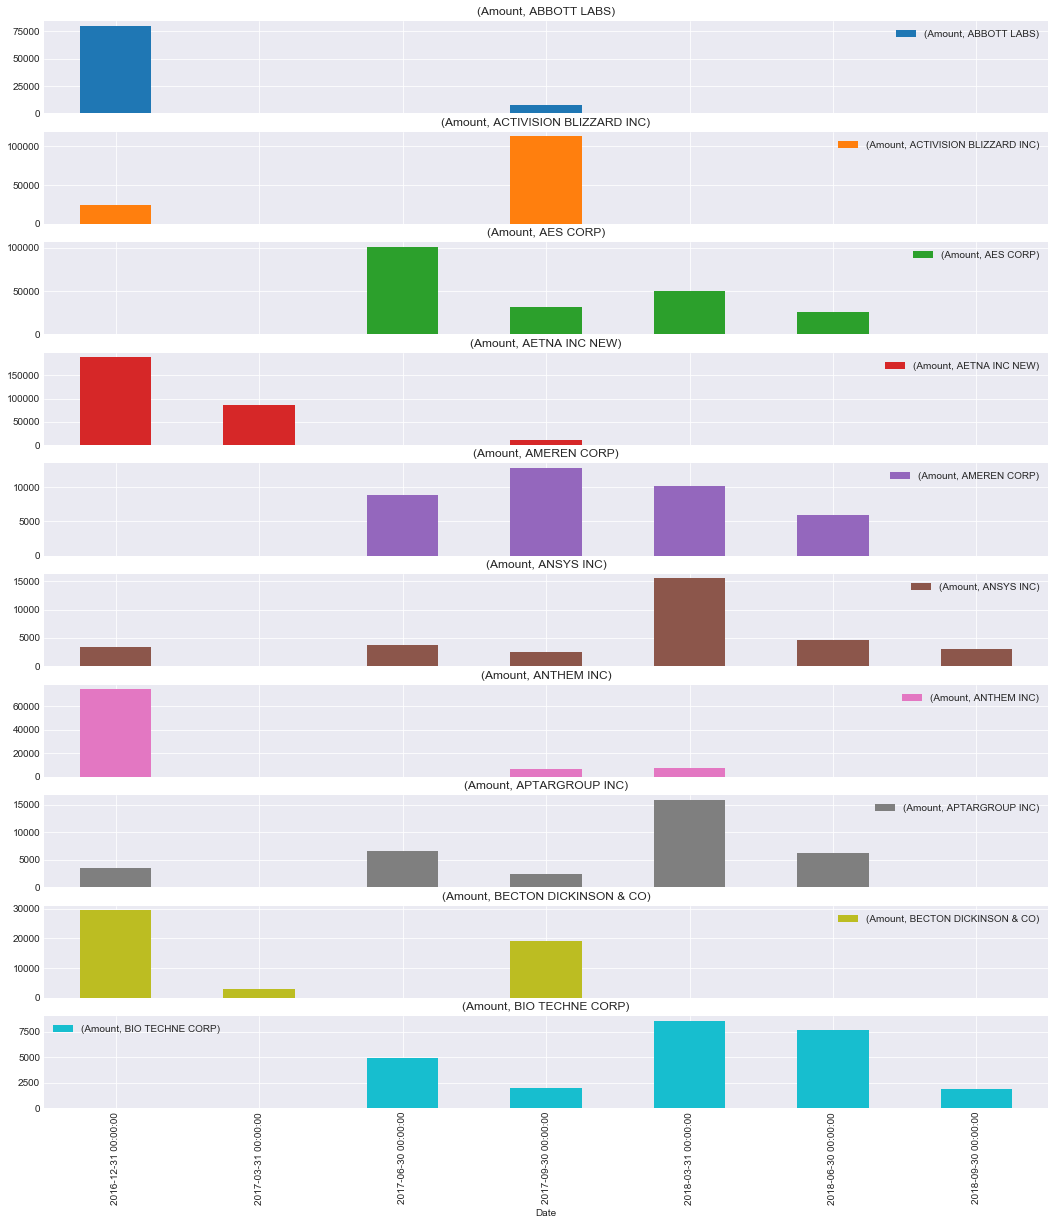

In [0]:
df_dump.iloc[:, 0:10].plot.bar(subplots= True)
fig = plt.gcf()
fig.set_size_inches(18,20)
plt.show()

In [0]:
df = df.drop('Amount', axis =1).groupby(['Date', 'Name']).sum().unstack()

In [0]:
df.shape

(8, 687)

In [0]:
df.iloc[:,0:10]

Size$k                                              \
Name         3M CO 51JOB INC ABBOTT LABS ACCENTURE PLC IRELAND   
Date                                                             
2016-12-31     NaN       NaN      3080.0                   NaN   
2017-03-31     NaN       NaN         NaN                4528.0   
2017-06-30     NaN       NaN         NaN                4485.0   
2017-09-30     NaN       NaN       407.0                   NaN   
2017-12-31  3587.0       NaN         NaN                   NaN   
2018-03-31     NaN       NaN         NaN                   NaN   
2018-06-30     NaN       NaN         NaN                   NaN   
2018-09-30     NaN     362.0         NaN                   NaN   

                                                                    \
Name       ACTIVISION BLIZZARD INC ACUITY BRANDS INC ADOBE SYS INC   
Date                                                                 
2016-12-31                   857.0               NaN           NaN   
2017-03-31                     NaN               NaN       11668.0   
2017-06-30                     NaN             244.0       11944.0   
2017-09-30                  7277.0               NaN           NaN   
2017-12-31                     NaN               NaN        2185.0   
2018-03-31                     NaN             785.0         273.0   
2018-06-30                     NaN             346.0           NaN   
2018-09-30                     NaN               NaN           NaN   

                                                         
Name       ADTALEM GLOBAL ED INC AES CORP AETNA INC NEW  
Date                                                     
2016-12-31                   NaN      NaN       23438.0  
2017-03-31                   NaN      NaN       10965.0  
2017-06-30                   NaN   1124.0           NaN  
2017-09-30                   NaN    343.0        1893.0  
2017-12-31                   NaN      NaN           NaN  
2018-03-31                 331.0    570.0           NaN  
2018-06-30                 200.0    354.0           NaN  
2018-09-30                   NaN      NaN           NaN

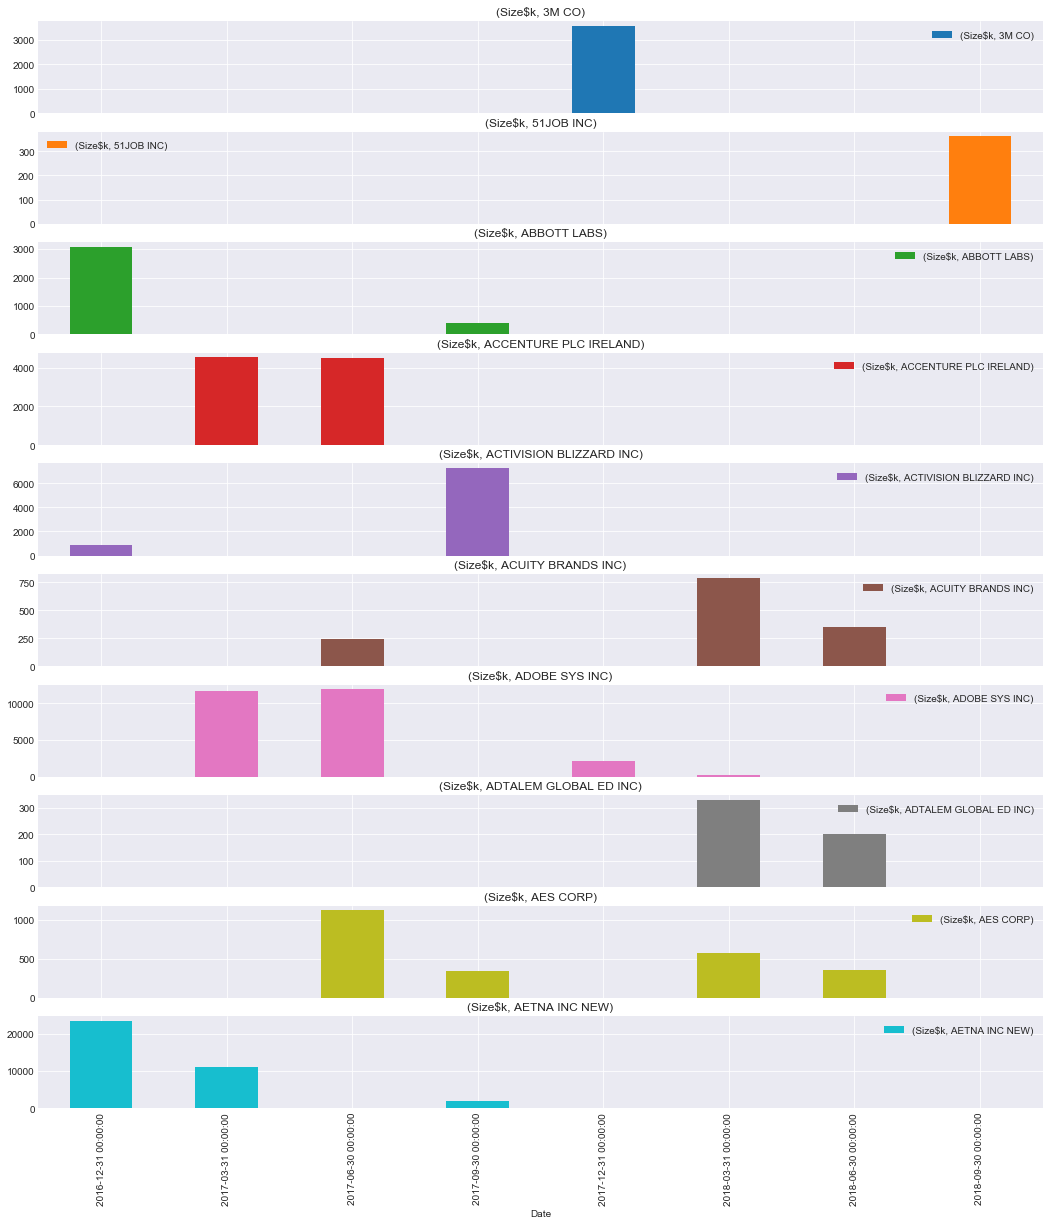

In [0]:
df.iloc[:,0:10].plot.bar(subplots = True)
fig = plt.gcf()
fig.set_size_inches(18,20)
plt.show()

In [0]:
df.plot(subplots = True)
fig = plt.gcf()
fig.set_size_inches(18,200)
plt.show()

ValueError: Image size of 1296x144000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1296x144000 with 687 Axes>

In [0]:
!pip install plotnine

    100% |████████████████████████████████| 3.6MB 269kB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 434kB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 1.2MB/s ta 0:00:011


In [0]:
from plotnine import *

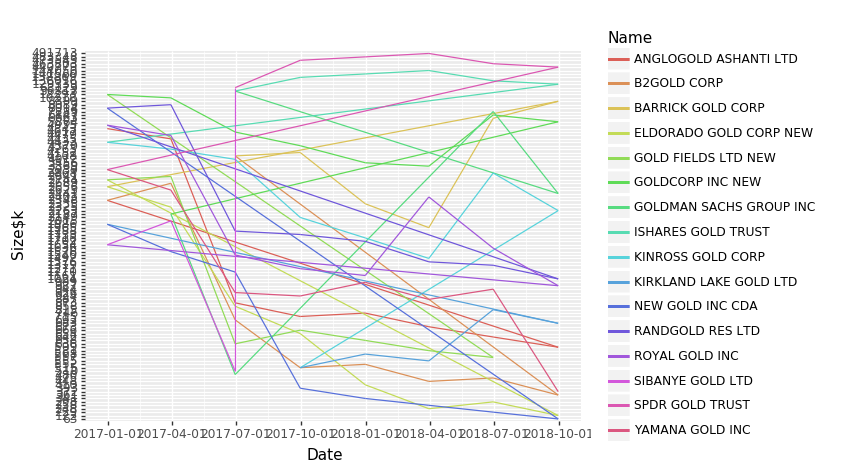

<ggplot: (-9223372029298587718)>

In [0]:
(ggplot(df_gold) + aes(x = 'Date', y = 'Size$k', color = 'Name')+geom_line(group = 'Name'))

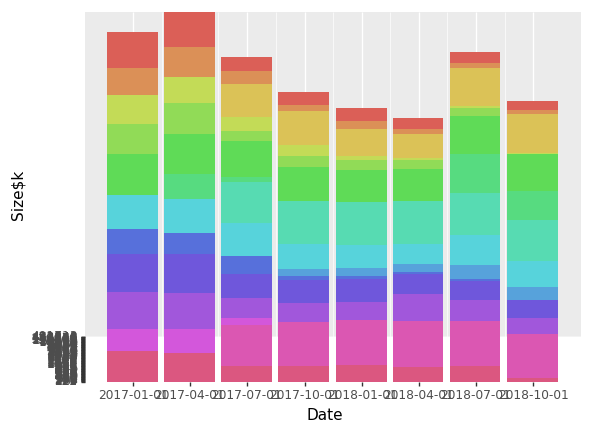

<ggplot: (7557572037)>

In [0]:
(ggplot(df_gold) + aes(x = 'Date', y = 'Size$k', fill = 'Name')+geom_bar(stat='identity', show_legend=False))

In [0]:
data = xls.parse('20161231', skiprows=2).iloc[:,[0,3,4]]
data['Date'] = '20161231'
data.columns = ['Name', 'Size$k','Amount', 'Date' ]

data

,Name,Size$k,Amount,Date
0,ABBOTT LABS,3080,80200,20161231
1,ACTIVISION BLIZZARD INC,857,23744,20161231
2,AETNA INC NEW,23438,189000,20161231
3,AFFILIATED MANAGERS GROUP,3008,20700,20161231
4,AFLAC INC,3171,45563,20161231
5,AGNICO EAGLE MINES LTD,10768,256381,20161231
6,ALLIANCE DATA SYSTEMS CORP,12946,56655,20161231
7,ALPHABET INC,4755,6000,20161231
8,AMERICAN TOWER CORP NEW,2376,22485,20161231
9,AMERIPRISE FINL INC,2108,19000,20161231


In [0]:
data2 = xls.parse('20170331', skiprows=2).iloc[:,[0,3,4]]
data2.columns = ['Name', ' Size$k','Amount' ]
data2['Date'] = '20170331'
data2

,Name,Size$k,Amount,Date
0,ACCENTURE PLC IRELAND,4528,37774,20170331
1,ADOBE SYS INC,11668,89664,20170331
2,AETNA INC NEW,10965,85970,20170331
3,AGNICO EAGLE MINES LTD,9281,218677,20170331
4,AIR PRODS & CHEMS INC,644,4759,20170331
5,ALEXION PHARMACEUTICALS INC,1621,13370,20170331
6,ALLIANCE DATA SYSTEMS CORP,12889,51763,20170331
7,ALPHABET INC,3366,3970,20170331
8,AMERICAN TOWER CORP NEW,2239,18425,20170331
9,AMERISOURCEBERGEN CORP,7865,88867,20170331


In [0]:
data.append(data2)

,Name,Size$k,Amount,Date
0,ACCENTURE PLC IRELAND,4528,37774,20170331
1,ADOBE SYS INC,11668,89664,20170331
2,AETNA INC NEW,10965,85970,20170331
3,AGNICO EAGLE MINES LTD,9281,218677,20170331
4,AIR PRODS & CHEMS INC,644,4759,20170331
5,ALEXION PHARMACEUTICALS INC,1621,13370,20170331
6,ALLIANCE DATA SYSTEMS CORP,12889,51763,20170331
7,ALPHABET INC,3366,3970,20170331
8,AMERICAN TOWER CORP NEW,2239,18425,20170331
9,AMERISOURCEBERGEN CORP,7865,88867,20170331


In [0]:
all = pd.read_excel('BridgeWater.xlsx', sheet_name = None)

In [0]:
all['20161231']

,COLUMN 1,COLUMN 2,COLUMN 3,COLUMN 4,COLUMN 5,COLUMN 6,COLUMN 7,COLUMN 8,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,VALUE,SHRS OR,SH/,PUT/,INVESTMENT,OTHER,VOTING AUTHORITY,NaN,NaN
1,NAME OF ISSUER,TITLE OF CLASS,CUSIP,(x$1000),PRN AMT,PRN,CALL,DISCRETION,MANAGER,SOLE,SHARED,NONE
2,ABBOTT LABS,COM,2824100,3080,80200,SH,NaN,SOLE,NaN,80200,0,0
3,ACTIVISION BLIZZARD INC,COM,00507V109,857,23744,SH,NaN,SOLE,NaN,23744,0,0
4,AETNA INC NEW,COM,00817Y108,23438,189000,SH,NaN,SOLE,NaN,189000,0,0
5,AFFILIATED MANAGERS GROUP,COM,8252108,3008,20700,SH,NaN,SOLE,NaN,20700,0,0
6,AFLAC INC,COM,1055102,3171,45563,SH,NaN,SOLE,NaN,45563,0,0
7,AGNICO EAGLE MINES LTD,COM,8474108,10768,256381,SH,NaN,SOLE,NaN,256381,0,0
8,ALLIANCE DATA SYSTEMS CORP,COM,18581108,12946,56655,SH,NaN,SOLE,NaN,56655,0,0
9,ALPHABET INC,CAP STK CL A,02079K305,4755,6000,SH,NaN,SOLE,NaN,6000,0,0
